In [1]:
import re
import os
import sys
import pandas as pd
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colormaps
#list(colormaps)
plt.rcParams['font.family'] = 'Times New Roman'
matplotlib.style.use('tableau-colorblind10') #seaborn-v0_8-whitegrid  tableau-colorblind10

In [2]:
sys.path.append('/Users/susierwu/Dropbox/DLCA_DynCO2/pdpLCA_GT/') 
root_path = '/Users/susierwu/Dropbox/DLCA_DynCO2/pdpLCA_GT/notebooks/notebook_veh_wh_dLCIA/dlcia_output/'

In [3]:
dicev =  xr.open_dataset(os.path.abspath(os.path.join(root_path, 'V2_ICEVdGT_dpIRFCRF.nc')))

In [4]:
dicev

<xarray.Dataset>
Dimensions:    (ensemble: 1001, lcia_year: 120, SSP: 3, dpLCA_IC: 3, v_year: 3,
                v_module: 1, tech_list: 1)
Coordinates:
  * ensemble   (ensemble) int32 0 1 2 3 4 5 6 7 ... 994 995 996 997 998 999 1000
  * lcia_year  (lcia_year) int32 1 2 3 4 5 6 7 8 ... 114 115 116 117 118 119 120
  * SSP        (SSP) object 'ssp119' 'ssp245' 'ssp585'
  * dpLCA_IC   (dpLCA_IC) object 'dpIRF' 'dpCRF' 'dpGWP'
  * v_year     (v_year) int32 2030 2040 2050
  * v_module   (v_module) object 'V2_oper_EF'
  * tech_list  (tech_list) object 'dummy_tech'
Data variables:
    dplcia     (SSP, v_year, v_module, tech_list, lcia_year, dpLCA_IC, ensemble) float64 ...

## plot all SSP

In [5]:
def plot_v2_icev_pervy_or_ssp ( dicev, metric = 'dpCRF', tech = 'dummy_tech'):
    legend_vyear_4p, legend_ssp_3p = [] , []
    for sp in dicev["SSP"].values:
        ddp2 = dicev.sel(SSP = sp, v_module = 'V2_oper_EF' , tech_list = tech, dpLCA_IC = metric, ensemble = 0 )['dplcia'] 
        legend_vyear_4p.append(ddp2)
        
    for vy in dicev["v_year"].values:
        ddp2 = dicev.sel(v_year = vy, v_module = 'V2_oper_EF' , tech_list = tech, dpLCA_IC = metric, ensemble = 0 )['dplcia'] 
        legend_ssp_3p.append(ddp2)

    return (legend_vyear_4p, legend_ssp_3p )

In [6]:
xx_i, yy_i = plot_v2_icev_pervy_or_ssp( dicev, metric = 'dpIRF', tech = 'dummy_tech')
xx_c, yy_c = plot_v2_icev_pervy_or_ssp( dicev, metric = 'dpCRF', tech = 'dummy_tech')

In [7]:
print(len(xx_i), len( yy_i))
print(len(xx_c), len( yy_c))

3 3
3 3


### IRF & CRF - by SSP [3 * 2]   

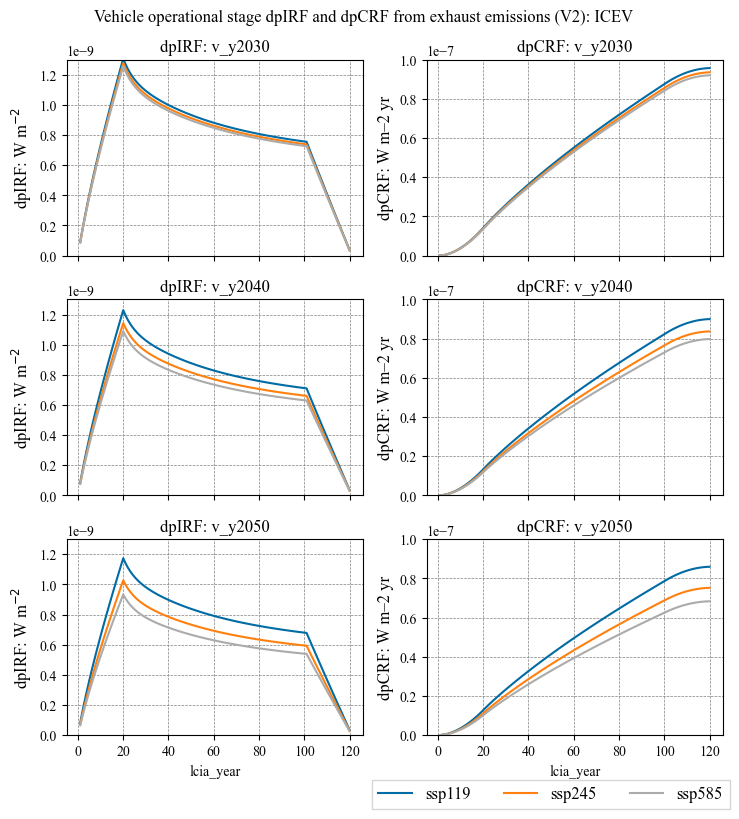

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(7.5, 8))
plt.subplots_adjust(wspace=1.36)

vylist = ['2030', '2040', '2050'] 
for i, vv in zip( range(3), vylist):
    for j in range(2) : 
        ax = axs[i,j]
        #axs[i,j].set_xlim(0, 120) #adding a bit row margin for figsize, make sure 120 appears
        axs[i,j].grid(True, linestyle='--', linewidth=0.5, color='gray')
        if j == 0: 
            axs[i,j].set_ylim(0, 1.3e-9)
            yy_i_p = yy_i[i].sel(SSP = ['ssp119', 'ssp245' , 'ssp585'])
            yy_i_p.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "dpIRF: v_y" +  vv 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('dpIRF: W m$^{-2}$', fontsize=12) 
            
        elif j == 1: 
            axs[i,j].set_ylim(0, 10e-8)
            yy_c_p = yy_c[i].sel(SSP = ['ssp119', 'ssp245' , 'ssp585'])
            yy_c_p.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "dpCRF: v_y" +  vv 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('dpCRF: W m–2 yr', fontsize=12)
            
        if i != 2:
            axs[i,j].set_xticklabels([]) 
            axs[i,j].set_xlabel('') 

label = ['ssp119', 'ssp245' , 'ssp585']
fig.legend(label, loc='lower right', bbox_to_anchor=(1, -0.03), fancybox=False,  ncol=4, prop={'size': 12})

tt = 'Vehicle operational stage dpIRF and dpCRF from exhaust emissions (V2): ICEV'
fig.suptitle(tt , fontsize=12)
plt.tight_layout()
plt.savefig('Fig5_V2.jpg', dpi=300,  bbox_inches='tight')
plt.show()

## for 2SSP only:  IRF & CRF - by SSP [3 * 2]

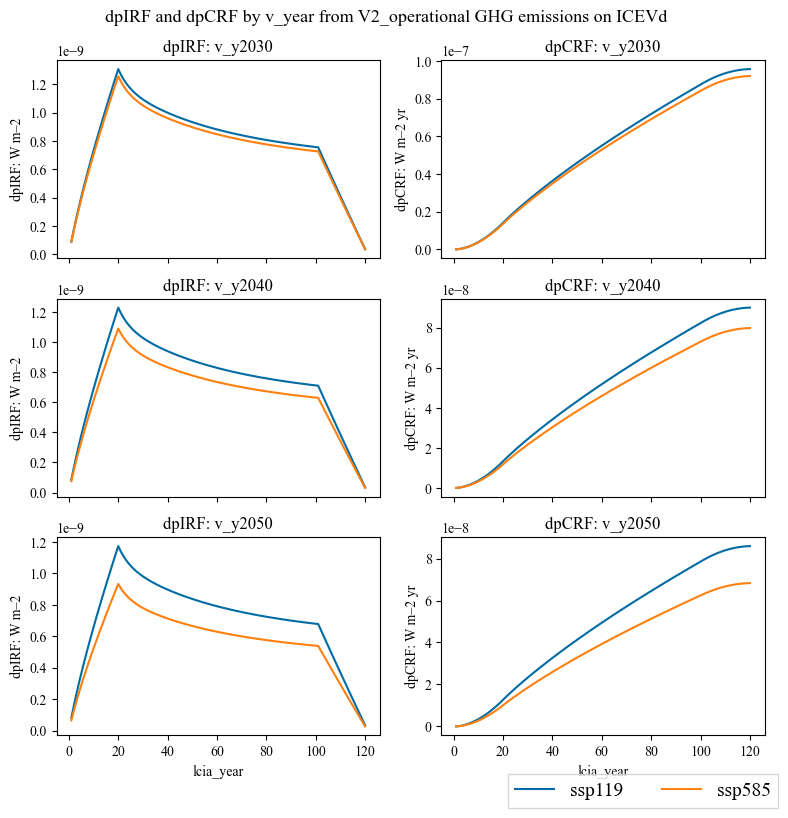

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8))
vylist = ['2030', '2040', '2050'] 
for i, vv in zip( range(3), vylist):
    for j in range(2) : 
        ax = axs[i,j]
        #axs[i,j].set_ylim(-3e-8, 1.5e-8) 
        if j == 0: 
            yy_ii = yy_i[i].sel(SSP = ["ssp119", "ssp585"])
            yy_ii.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "dpIRF: v_y" +  vv 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('dpIRF: W m–2') 
            
        elif j == 1: 
            yy_cc = yy_c[i].sel(SSP = ["ssp119", "ssp585"])
            yy_cc.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "dpCRF: v_y" +  vv 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('dpCRF: W m–2 yr')
            
        if i != 2:
            axs[i,j].set_xticklabels([]) 
            axs[i,j].set_xlabel('') 

label = ['ssp119', 'ssp585']
fig.legend(label, loc='lower right', bbox_to_anchor=(1, -0.03), fancybox=False,  ncol=4 , prop={'size': 14} )

tt = 'dpIRF and dpCRF' +  ' by v_year from V2_operational GHG emissions on ICEVd '
fig.suptitle(tt , fontsize=13)
plt.tight_layout()
plt.show()

plt.savefig("V2_SSP119vsSSP585.png")

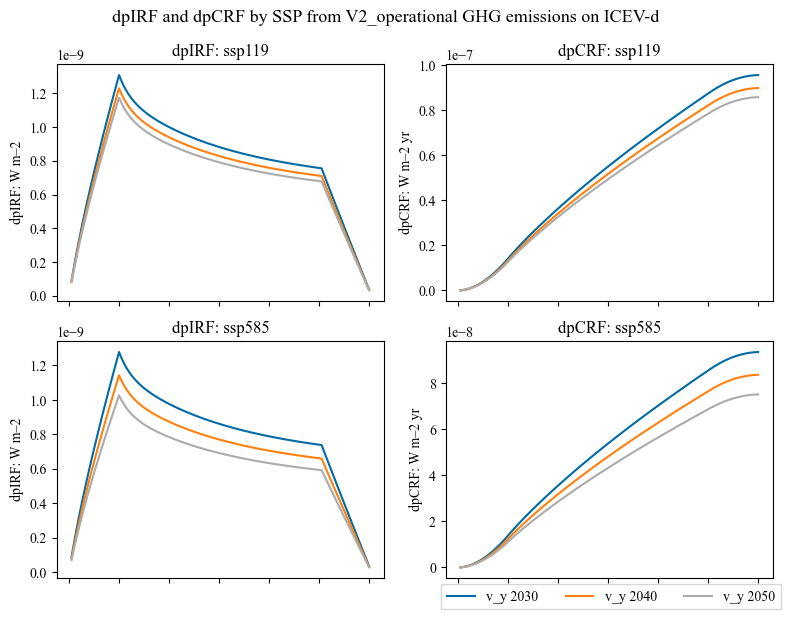

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
splist = ['ssp119',  'ssp585'] 
for i, sp in zip( range(4), splist):
    for j in range(2) : 
        ax = axs[i,j]
        #axs[i,j].set_ylim(-3e-8, 1.5e-8) 
        if j == 0: 
            xx_i[i].plot(x='lcia_year', hue= 'v_year', ax=ax, add_legend=False)
            subtitle =   "dpIRF: " +  sp 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('dpIRF: W m–2') 
            
        elif j == 1: 
            xx_c[i].plot(x='lcia_year', hue= 'v_year', ax=ax, add_legend=False)
            subtitle =   "dpCRF: " +  sp 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('dpCRF: W m–2 yr')
            
        if i != 3:
            axs[i,j].set_xticklabels([]) 
            axs[i,j].set_xlabel('') 

label = ['v_y 2030', 'v_y 2040', 'v_y 2050'] 
fig.legend(label, loc='lower right', bbox_to_anchor=(1, -0.03), fancybox=False,  ncol=4)

tt = 'dpIRF and dpCRF' +  ' by SSP from V2_operational GHG emissions on ICEV-d '
fig.suptitle(tt , fontsize=13)
plt.tight_layout()
plt.show()